In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install  scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install keras

In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install  tensorflow

Note: you may need to restart the kernel to use updated packages.


In [7]:
import math
import numpy as np
import pandas as pdr
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
from numpy.random import seed
from keras.models import Sequential
import random
import os
from keras import backend as K

In [8]:
seed_value=42
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
K.set_session(sess)

In [9]:

url = "https://raw.githubusercontent.com/Iviggar1/Pandas/main/ETH-USD.csv"
data = pdr.read_csv(url)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,1.643290e+05
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,6.741880e+05
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,5.321700e+05
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,4.052830e+05
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1.463100e+06
...,...,...,...,...,...,...,...
2281,2021-11-04,4604.678711,4606.516113,4426.622559,4537.324219,4537.324219,1.841524e+10
2282,2021-11-05,4537.423340,4570.895996,4447.487305,4486.243164,4486.243164,1.508600e+10
2283,2021-11-06,4482.647949,4530.997070,4334.973633,4521.581055,4521.581055,1.442908e+10
2284,2021-11-07,4523.981934,4640.921875,4510.984375,4620.554688,4620.554688,1.354138e+10


In [10]:
data.shape

(2286, 7)

In [11]:
missing_values_count = data.isnull().sum()
missing_values_count

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [12]:
data = data.dropna(how='any',axis=0) 
data.shape

(2282, 7)

In [13]:
val = data['Date'].values[1891]
val

'2020-10-14'

In [14]:
val = data.values[1890]
val

array(['2020-10-11', 370.928436, 377.246796, 369.828033, 375.142059,
       375.142059, 12584512533.0], dtype=object)

In [15]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,1.643290e+05
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,6.741880e+05
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,5.321700e+05
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,4.052830e+05
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1.463100e+06
...,...,...,...,...,...,...,...
2281,2021-11-04,4604.678711,4606.516113,4426.622559,4537.324219,4537.324219,1.841524e+10
2282,2021-11-05,4537.423340,4570.895996,4447.487305,4486.243164,4486.243164,1.508600e+10
2283,2021-11-06,4482.647949,4530.997070,4334.973633,4521.581055,4521.581055,1.442908e+10
2284,2021-11-07,4523.981934,4640.921875,4510.984375,4620.554688,4620.554688,1.354138e+10


In [16]:
data.shape

(2282, 7)

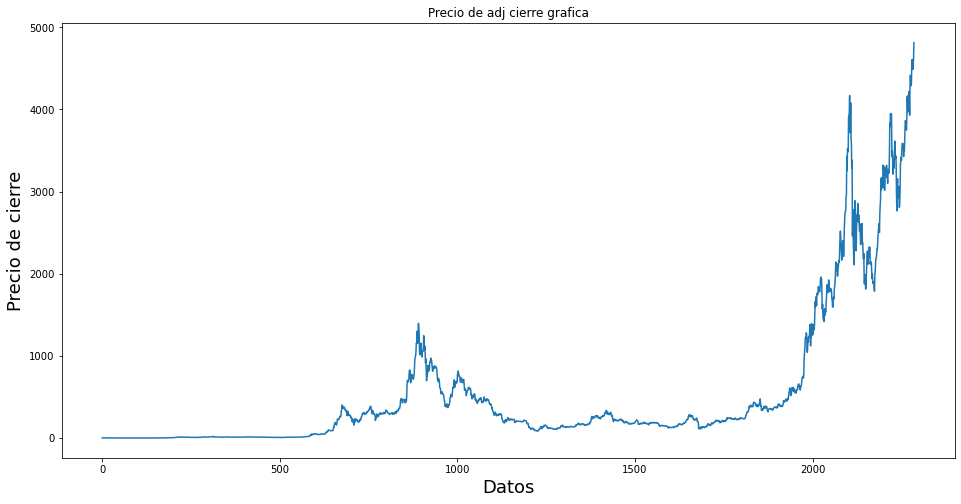

In [17]:
from matplotlib import pyplot as plt
plt.figure(figsize=(16,8))
plt.title("Precio de adj cierre grafica")
plt.plot(data['Adj Close'])

plt.xlabel('Datos',fontsize=18)
plt.ylabel('Precio de cierre',fontsize=18)

plt.savefig('GraficaAdjCierre.png', bbox_inches='tight')

In [18]:
data1=data.filter(['Adj Close'])
dataset=data1.values
df1=dataset

In [19]:
trining_data_len=math.ceil(len(dataset)*.70)
trining_data_len

1598

In [20]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[4.85756393e-04],
       [6.61926428e-05],
       [5.55044231e-05],
       ...,
       [9.39624413e-01],
       [9.60193985e-01],
       [1.00000000e+00]])

In [21]:
train_data=scaled_data[0:trining_data_len,:]
x_train=[]
y_train=[]
for i in range(50,len(train_data)):
  x_train.append(train_data[i-50:i,0])
  y_train.append(train_data[i,0])


In [22]:

x_train,y_train=np.array(x_train), np.array(y_train)

In [23]:
x_train

array([[4.85756393e-04, 6.61926428e-05, 5.55044231e-05, ...,
        9.53055095e-05, 7.87216022e-05, 6.26383546e-05],
       [6.61926428e-05, 5.55044231e-05, 5.68659095e-05, ...,
        7.87216022e-05, 6.26383546e-05, 7.29759671e-05],
       [5.55044231e-05, 5.68659095e-05, 1.31562076e-04, ...,
        6.26383546e-05, 7.29759671e-05, 5.94411163e-05],
       ...,
       [3.82939826e-02, 3.81432548e-02, 3.81438731e-02, ...,
        2.76784739e-02, 2.53902496e-02, 2.75700215e-02],
       [3.81432548e-02, 3.81438731e-02, 3.81346924e-02, ...,
        2.53902496e-02, 2.75700215e-02, 2.67862870e-02],
       [3.81438731e-02, 3.81346924e-02, 3.78228033e-02, ...,
        2.75700215e-02, 2.67862870e-02, 2.67332739e-02]])

In [24]:
y_train

array([7.29759671e-05, 5.94411163e-05, 3.07705092e-05, ...,
       2.67862870e-02, 2.67332739e-02, 2.65389323e-02])

In [25]:
x_train.shape

(1548, 50)

In [26]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1548, 50, 1)

In [27]:
seed(42)
tf.random.set_seed(42)
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1),activation='relu'))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(x_train,y_train,batch_size=42,epochs=100)

Epoch 1/100
37/37 [==============================] - 5s 40ms/step - loss: 9.3227e-04
Epoch 2/100
37/37 [==============================] - 2s 44ms/step - loss: 1.3758e-04
Epoch 3/100
37/37 [==============================] - 2s 45ms/step - loss: 1.1735e-04
Epoch 4/100
37/37 [==============================] - 2s 52ms/step - loss: 1.0292e-04
Epoch 5/100
37/37 [==============================] - 2s 53ms/step - loss: 9.3102e-05
Epoch 6/100
37/37 [==============================] - 2s 54ms/step - loss: 8.7336e-05
Epoch 7/100
37/37 [==============================] - 2s 58ms/step - loss: 7.6927e-05
Epoch 8/100
37/37 [==============================] - 2s 62ms/step - loss: 7.5554e-05: 0s - loss: 7.7455e
Epoch 9/100
37/37 [==============================] - 2s 62ms/step - loss: 8.5358e-05
Epoch 10/100
37/37 [==============================] - 2s 61ms/step - loss: 6.6987e-05
Epoch 11/100
37/37 [==============================] - 2s 62ms/step - loss: 6.6359e-05: 0s - loss: 6.9
Epoch 12/100
37/37 [=======

In [28]:
test_data=scaled_data[trining_data_len - 50: , :]
x_test=[]
y_test=[]
y_test=dataset[trining_data_len:,:]
for i in range (50,len(test_data)):
  x_test.append(test_data[i-50:i,0])

In [29]:
test_data.shape

(734, 1)

In [30]:
x_test=np.array(x_test)

In [31]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(684, 50, 1)

In [32]:
Predicciones=model.predict(x_test)
Predicciones=scaler.inverse_transform(Predicciones)

In [33]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [34]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [35]:
rmse=np.sqrt(np.mean(Predicciones - y_test) **2)
rmse

12.111139684164842

In [36]:
Predicciones

array([[ 134.40753],
       [ 137.67703],
       [ 135.38008],
       [ 135.11067],
       [ 132.80585],
       [ 132.09059],
       [ 132.5657 ],
       [ 133.57712],
       [ 139.09398],
       [ 138.70241],
       [ 136.06038],
       [ 136.28235],
       [ 133.52518],
       [ 138.40941],
       [ 140.4155 ],
       [ 141.961  ],
       [ 148.93152],
       [ 150.02191],
       [ 148.36531],
       [ 145.99007],
       [ 149.46472],
       [ 149.51033],
       [ 152.0048 ],
       [ 151.28494],
       [ 169.03432],
       [ 173.64778],
       [ 173.19112],
       [ 178.10797],
       [ 182.91713],
       [ 177.03485],
       [ 175.62418],
       [ 177.36057],
       [ 176.70802],
       [ 172.21338],
       [ 171.29907],
       [ 169.71484],
       [ 175.07526],
       [ 178.8447 ],
       [ 184.31064],
       [ 184.47292],
       [ 192.36623],
       [ 190.34697],
       [ 192.61604],
       [ 197.07759],
       [ 199.08398],
       [ 198.95142],
       [ 211.26672],
       [ 220.

<ipython-input-37-f99206b35ad1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predicciones']=Predicciones


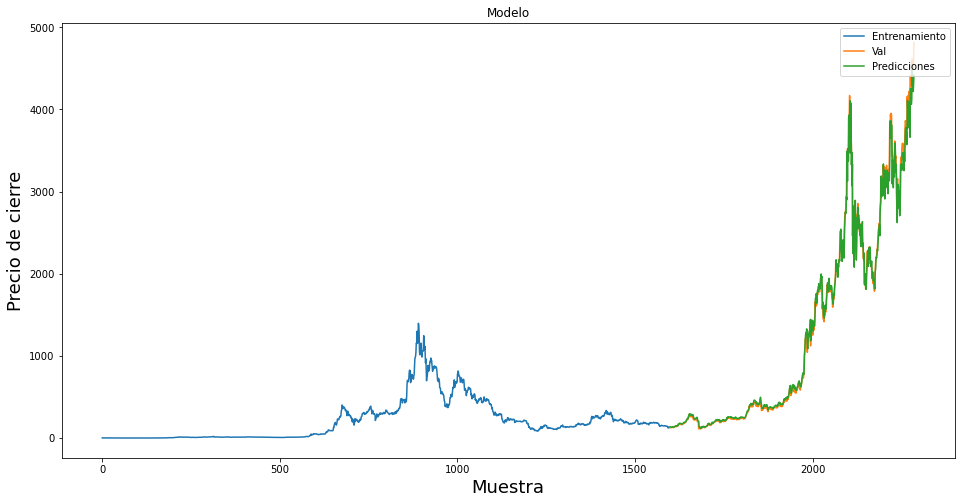

In [37]:
train=data[:trining_data_len]
valid=data[trining_data_len:]
valid['Predicciones']=Predicciones
plt.figure(figsize=(16,8))
plt.title('Modelo')
plt.xlabel('Muestra', fontsize=18)
plt.ylabel("Precio de cierre",fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close','Predicciones']])
plt.legend(['Entrenamiento','Val','Predicciones'],loc='upper right')
plt.show()

In [38]:
def visualizar(real, prediccion):
    plt.figure(figsize=(16,8))
    plt.plot(real[0:len(prediccion)],color='red',label="Precio real de Adj Close")
    plt.plot(prediccion,color='blue',label="Prediccion de Adj Close")
    plt.xlabel("Muestra")
    plt.ylabel("Precio de la accion")
    plt.legend()
    plt.savefig('GraficaAdjCierrePrediccion.png', bbox_inches='tight')
    plt.show()

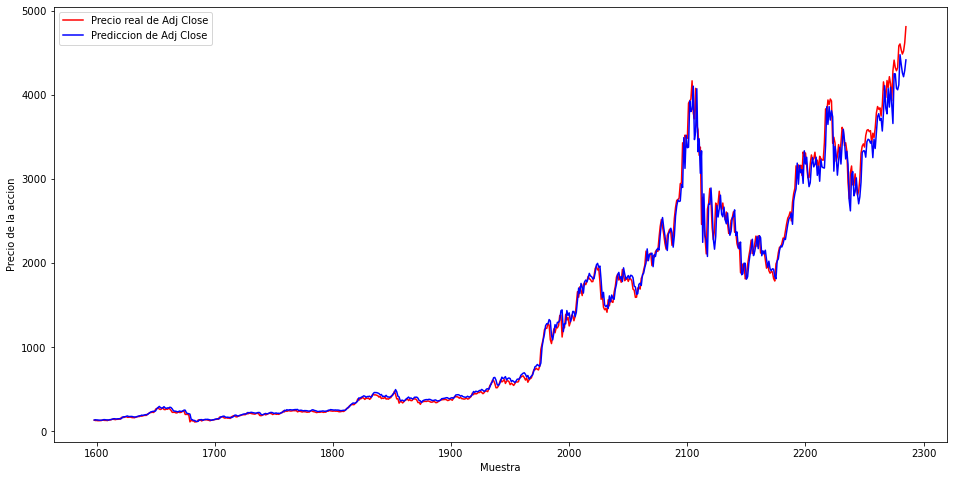

In [39]:
visualizar(valid['Adj Close'], valid['Predicciones'])

In [41]:
diferncia=0
for i in range(0,len(valid.index)):
  diferncia=abs(valid['Adj Close']-valid['Predicciones'])
  new_df=valid.assign(Diferencia=diferncia)


In [42]:
new_df1=new_df.filter(['Fecha','Adj Close','Predicciones','Diferencia'])
new_df1

,Adj Close,Predicciones,Diferencia
1598,132.372513,134.407532,2.035019
1599,128.614090,137.677032,9.062942
1600,129.063889,135.380081,6.316192
1601,126.454636,135.110672,8.656036
1602,126.361221,132.805847,6.444626
...,...,...,...
2281,4537.324219,4365.287598,172.036621
2282,4486.243164,4263.977051,222.266113
2283,4521.581055,4216.921387,304.659668
2284,4620.554688,4292.165527,328.389161


In [43]:
test_data

array([[0.03813469],
       [0.0378228 ],
       [0.03863961],
       [0.03925249],
       [0.03972835],
       [0.03897657],
       [0.03819408],
       [0.03836393],
       [0.03928847],
       [0.03845972],
       [0.03874107],
       [0.03903522],
       [0.03856571],
       [0.03742713],
       [0.0380147 ],
       [0.03838274],
       [0.03743512],
       [0.03679   ],
       [0.03642481],
       [0.03346623],
       [0.03113968],
       [0.03179427],
       [0.0295948 ],
       [0.03035167],
       [0.03086886],
       [0.03170963],
       [0.03144091],
       [0.03218631],
       [0.03161177],
       [0.03133038],
       [0.03088842],
       [0.03065924],
       [0.03040804],
       [0.03092787],
       [0.03091653],
       [0.03082794],
       [0.0313468 ],
       [0.03071509],
       [0.03030813],
       [0.02975551],
       [0.03017034],
       [0.03003332],
       [0.02960197],
       [0.02965305],
       [0.02767847],
       [0.02539025],
       [0.02757002],
       [0.026

In [44]:
a=test_data[634:684]
a

array([[0.53233628],
       [0.54237467],
       [0.51996996],
       [0.56616412],
       [0.58751001],
       [0.60073058],
       [0.65607479],
       [0.62625009],
       [0.6582814 ],
       [0.65284355],
       [0.65753091],
       [0.63241879],
       [0.69036091],
       [0.67856282],
       [0.68792775],
       [0.65592323],
       [0.62648146],
       [0.62757129],
       [0.66136681],
       [0.68302946],
       [0.67038281],
       [0.67371461],
       [0.68974691],
       [0.65923743],
       [0.67013992],
       [0.64424656],
       [0.67963469],
       [0.67419009],
       [0.67057374],
       [0.67002748],
       [0.71353818],
       [0.79689737],
       [0.78778655],
       [0.81888288],
       [0.80791235],
       [0.82127682],
       [0.81634002],
       [0.71201306],
       [0.72675246],
       [0.71220962],
       [0.66735305],
       [0.67956761],
       [0.70863381],
       [0.6827336 ],
       [0.71258986],
       [0.75126951],
       [0.74212758],
       [0.706

In [45]:
x_input=test_data[684:].reshape(1,-1)
x_input.shape

(1, 50)

In [46]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [47]:
temp_input

[0.6148736913387283,
 0.5744380503508976,
 0.6395792390058749,
 0.6557183431539498,
 0.6091949315809423,
 0.6079264453576747,
 0.636336581984553,
 0.6097082119898102,
 0.583346731588719,
 0.5928749922651574,
 0.6237449775241699,
 0.6873067483212072,
 0.7048014077387128,
 0.7103430187747264,
 0.7023895077056304,
 0.7311591335046292,
 0.7440535509752815,
 0.7455941530631371,
 0.7405614586545918,
 0.7430465757362154,
 0.7119005169286979,
 0.7367363127778344,
 0.725766950131792,
 0.7493822083567129,
 0.7867524251942701,
 0.8026763941088063,
 0.7959733569483549,
 0.7994487558360127,
 0.7790099904621687,
 0.8057971749158539,
 0.8636445162974571,
 0.8425146794155288,
 0.8250277832351716,
 0.8669014817084549,
 0.8494936375781427,
 0.8765059529995287,
 0.8584716288908167,
 0.8167303094682518,
 0.8909379789919424,
 0.9174211325585663,
 0.8989043777330097,
 0.8910949668435256,
 0.8986916778373972,
 0.9527628874795736,
 0.9574172177040097,
 0.9428962962659024,
 0.9322801816929935,
 0.9396244133190

In [67]:
from numpy import array
lst_output=[]
n_steps=50
i=0
while(i<30):
    if(len(temp_input)>50):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)


0day input[0.51590401 0.5058822  0.49558124 0.48427993 0.47172499 0.45805839
 0.44358176 0.42886734 0.41458651 0.40140653 0.38992083 0.38054794
 0.37359783 0.36917534 0.36726388 0.36773336 0.37033299 0.37456194
 0.37997368 0.38613641 0.39270002 0.39939395 0.40593207 0.41209605
 0.41778779 0.42291296 0.42747197 0.43147224 0.43493077 0.4379853
 0.44074336 0.44326961 0.44562721 0.44787532 0.45009211 0.45229885
 0.4544839  0.45662928 0.45872173 0.46074787 0.46270427 0.46453565
 0.46615753 0.46749091 0.46848005 0.46910194 0.4693692  0.46932399
 0.46902919 0.46855891]
0 day output [[0.46798947]]
1day input[0.5058822  0.49558124 0.48427993 0.47172499 0.45805839 0.44358176
 0.42886734 0.41458651 0.40140653 0.38992083 0.38054794 0.37359783
 0.36917534 0.36726388 0.36773336 0.37033299 0.37456194 0.37997368
 0.38613641 0.39270002 0.39939395 0.40593207 0.41209605 0.41778779
 0.42291296 0.42747197 0.43147224 0.43493077 0.4379853  0.44074336
 0.44326961 0.44562721 0.44787532 0.45009211 0.45229885 0.

In [68]:
lst_output

[[0.4679894745349884],
 [0.46739140152931213],
 [0.46682459115982056],
 [0.4663337171077728],
 [0.4659465551376343],
 [0.46567437052726746],
 [0.46551358699798584],
 [0.46544960141181946],
 [0.4654597342014313],
 [0.46551695466041565],
 [0.46559420228004456],
 [0.4656692147254944],
 [0.465724915266037],
 [0.4657507836818695],
 [0.46574288606643677],
 [0.4657036066055298],
 [0.4656400978565216],
 [0.46556293964385986],
 [0.4654844105243683],
 [0.46541669964790344],
 [0.46537065505981445],
 [0.46535447239875793],
 [0.46537330746650696],
 [0.46542876958847046],
 [0.4655192494392395],
 [0.4656401574611664],
 [0.46578478813171387],
 [0.4659450054168701],
 [0.4661121964454651],
 [0.4662778973579407]]

In [69]:

predictions1=scaler.inverse_transform(lst_output)

In [70]:
predictions1

array([[2252.23758828],
       [2249.35986877],
       [2246.63257419],
       [2244.2706588 ],
       [2242.40776991],
       [2241.09811213],
       [2240.32447765],
       [2240.01660124],
       [2240.0653567 ],
       [2240.34068167],
       [2240.71237037],
       [2241.0733042 ],
       [2241.34131585],
       [2241.46578568],
       [2241.4277851 ],
       [2241.23878598],
       [2240.93320394],
       [2240.56194543],
       [2240.18409059],
       [2239.85828938],
       [2239.63673882],
       [2239.55887347],
       [2239.64950128],
       [2239.91636574],
       [2240.35172335],
       [2240.93349074],
       [2241.62940328],
       [2242.40031319],
       [2243.20477833],
       [2244.00207356]])

In [71]:
np.arange(1)

array([0])

In [72]:
day_new=np.arange(1,51)
day_pred=np.arange(51,81)

In [73]:
import matplotlib.pyplot as plt

In [74]:
dataset.shape


(2282, 1)

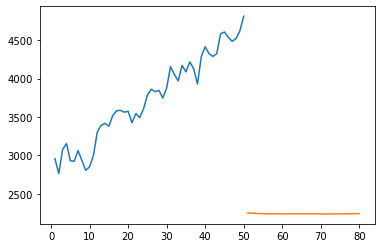

In [75]:
plt.plot(day_new,(dataset[2232:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

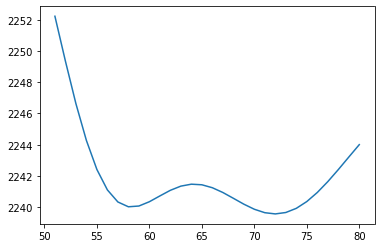

In [76]:
plt.plot(day_pred,scaler.inverse_transform(lst_output))

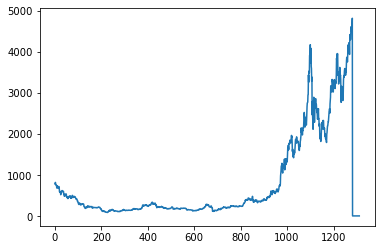

In [77]:
dataset=df1.tolist()
dataset.extend(lst_output)
plt.plot(dataset[1000:])